# FATRCC python module tutorial

## 1. Export the mechanical state of the system for both limits of the fatigue cycle

Be careful, it is required to activate the option "Show Tensor Components" in the export menu of ANSYS Mechanical. If not only the principal components are exported. In ANSYS Mechanical go to File --> Options --> Export --> Show Tensor Components --> Yes.

<img src="TUTORIAL_IMAGES/ANSYS_edit.PNG" width="900" height="900">


Depending on the analysis done it is required to save either the stress tensor or the strain tensor. For the elastic fatigue analysis, it is needed to save the stress tensor as shown below. To do so, follow these steps:

    1. Click on solution (Outline window)
    2. Then, on the home tab click on Worksheet
    3. In the solution quantities menu go to type = S, Expression = SVECTORS
    4. Right click on it and create a User Defined Result
    5. SVECTORS result will appear below solution. Evaluate it if needed and export as text file
    6. Then save it in the same folder where you are going to run the python code
    
<img src="TUTORIAL_IMAGES/save_stress.png" width="600" height="600">


Regarding the elastoplastic analysis the procedure is equal. The difference is that we are going to save the total strain tensor:

    1. Click on solution (Outline window)
    2. Then, on the home tab click on Worksheet
    3. In the solution quantities menu go to type = EPTT, Expression = EPTTVECTORS
    4. Right click on it and create a User Defined Result
    5. SVECTORS result will appear below solution. Evaluate it if needed and export as text file
    6. Then save it in the same folder where you are going to run the python code
    
<img src="TUTORIAL_IMAGES/save_strain.png" width="600" height="600">

At the end you should have your python file and the extracted results in the same file, like this: 

<img src="TUTORIAL_IMAGES/folderConfig.png" width="600" height="600">

## 2. Run your own code to obtain the result

First, load the library. Inside the parentheses, you must specify the relative route between your python file and the library. In this case it is in the container folder (Relative path "../")


In [1]:
import sys
sys.path.append('../')

from fatrcc import calculation as cl

Then, you can calculate the point with maximum stress range for the linear fatigue analysis and the maximum number of cycles until fatigue failure with the function cl.elastic_fatigue_worst(). The list of inputs is the following:

    1. Stress tensor map for the initial state (ANSYS) --> Pa, m
    2. Stress tensor map for the ending state (ANSYS) --> Pa, m
    3. Maximum temperature of the solid --> ºC
    4. Material of the solid (only X2CrNiMo17 available)
    5. Jf: Welding material reduction factor of the strain-cycles curve
    6. f: Fatigue strength reduction factor (function of the type of welding and inspection)
    

Reading file:  stress_start_test.txt  ---> Number of lines: 1974563
Reading file:  stress_end_test.txt  ---> Number of lines: 1974563

 Maximum equivalent stress range = 387.845 MPa
Point location in ANSYS units:
X = 0.031
Y = 0.138
Z = 0.053

 Maximum estimated strain range = 0.272%
eps 1 = 0.19%
eps 3 = 0.05%
eps 4 = 0.03%
39098


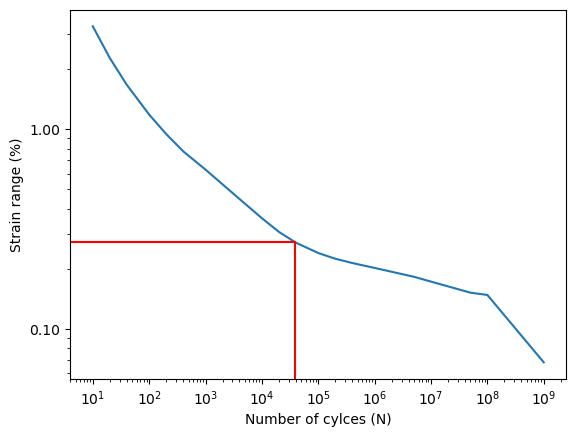


 Maximum number of cycles = 3.91e+04
############################################## 



In [2]:
cl.elastic_fatigue_worst("stress_end_test.txt", "stress_start_test.txt", 270 , "X2CrNiMo17", 1, 1)

Additionally you can calculate the point with maximum strain range for the elastoplastic analysis and the maximum number of cycles until fatigue failure with the function cl.elastoplastic_fatigue_worst(). The list of inputs is the following:

    1. Strain tensor map for the initial state (ANSYS) --> m/m, m
    2. Strain tensor map for the ending state (ANSYS) --> m/m, m
    3. Maximum temperature of the solid --> ºC
    4. Material of the solid. Available: X2CrNiMo17 (SS316L), CuCrZr, GlidcopAl15_Argonne (low cycles, RCC adjusted delta_eps/2)
    5. Jf: Welding material reduction factor of the strain-cycles curve
    6. f: Fatigue strength reduction factor (function of the type of welding and inspection)

Reading file:  strain_start_test.txt  ---> Number of lines: 1974563
Reading file:  strain_end_test.txt  ---> Number of lines: 1974563
99400


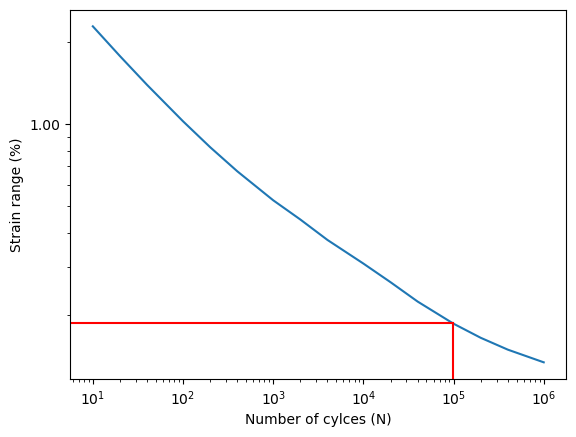


 Maximum equivalent strain range = 0.186%
Point location in ANSYS units:
X = 0.036
Y = 0.070
Z = 0.053

 Maximum number of cycles = 9.94e+04
############################################## 



In [3]:
cl.elastoplastic_fatigue_worst("strain_end_test.txt", "strain_start_test.txt", 270 , "CuCrZr", 1, 1)

It is also possible to extract the file with the equivalent strain or stress range:

    1. Tensor map for the initial state (ANSYS) 
    2. Tensor map for the ending state (ANSYS)
    3. Type of tensor ("Stress" or "Strain")
    4. Name of the output file


In [3]:
cl.write_mesh_range("stress_end_test.txt", "stress_start_test.txt", "Stress", "StressRange.csv")

Reading file:  stress_start_test.txt  ---> Number of lines: 1974563
Reading file:  stress_end_test.txt  ---> Number of lines: 1974563
<class 'numpy.ndarray'>
